In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Loading the data
df=pd.read_csv('..\data\Final Dataset.csv')
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0


In [7]:
# Spliting data into dependent and independent features
X=df.drop('stroke',axis=1)
y=df['stroke']

In [8]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.600000,0,1,0,0,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,0,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,0,0,0,1,0,1,0,0,0,1,0


In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [10]:
# Spliting dependent and independent features into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
3897,4.0,0,0,90.42,16.2,0,1,0,0,0,0,0,1,1,0,1,0,0,0
576,29.0,0,0,207.58,22.8,0,1,0,0,0,1,0,0,0,1,0,0,0,1
4013,44.0,1,0,91.28,26.5,0,1,0,0,0,1,0,0,1,0,0,0,1,0
4536,68.0,1,0,150.74,40.3,1,0,0,0,0,1,0,0,0,1,1,0,0,0
1180,62.0,0,0,82.57,36.0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


In [12]:
X_test.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
4688,31.0,0,0,64.85,23.0,0,1,0,0,0,0,1,0,1,0,1,0,0,0
4478,40.0,0,0,65.29,28.3,0,1,0,0,0,0,1,0,1,0,0,0,1,0
3849,8.0,0,0,74.42,22.5,1,0,0,0,0,0,0,1,0,1,1,0,0,0
4355,79.0,1,0,76.64,19.5,1,0,0,0,0,0,1,0,1,0,0,0,1,0
3826,75.0,0,0,94.77,27.2,1,0,0,1,0,0,0,0,1,0,0,0,1,0


In [13]:
y_train.head()

3897    0
576     0
4013    0
4536    0
1180    0
Name: stroke, dtype: int64

In [14]:
y_test.head()

4688    0
4478    0
3849    0
4355    0
3826    0
Name: stroke, dtype: int64

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3577, 19)
(1533, 19)
(3577,)
(1533,)


## Model Training

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [17]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

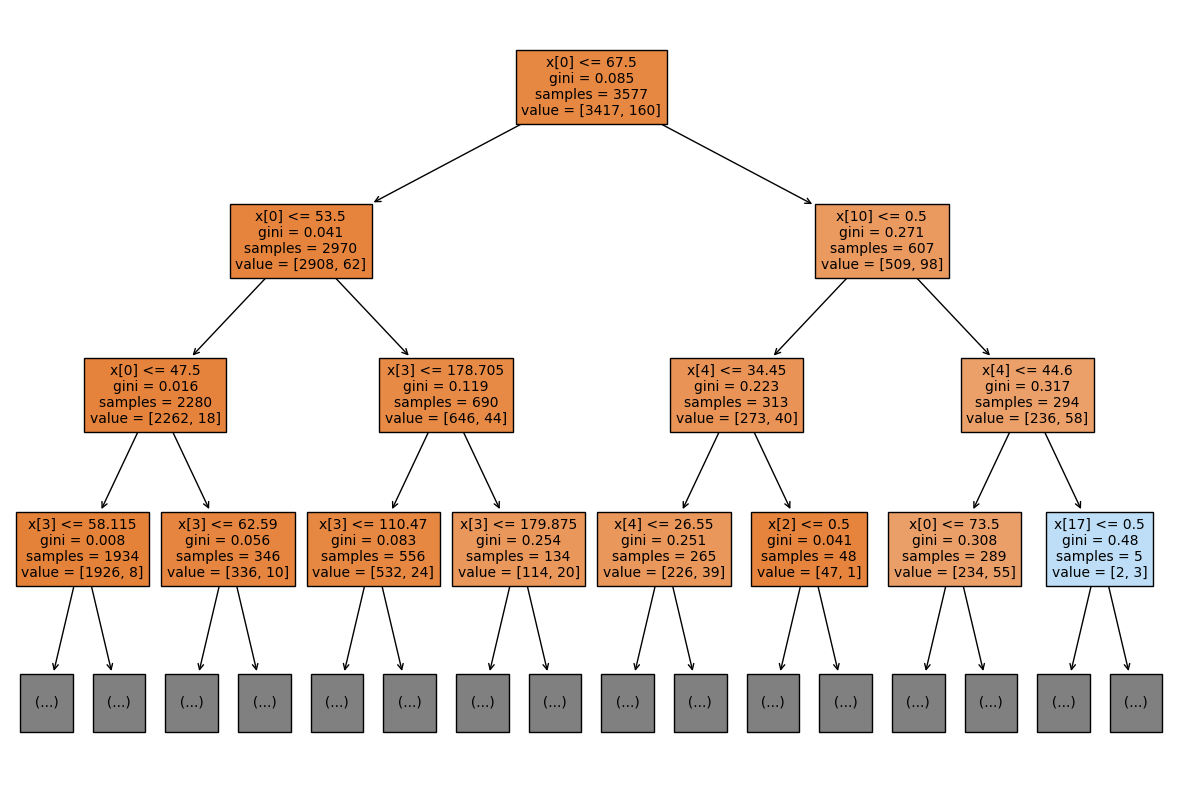

In [35]:
# Visualize the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True,fontsize=10,max_depth=3)
plt.show()

In [18]:
y_pred=classifier.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

In [20]:
print('Accuracy: ',accuracy)

Accuracy:  0.903457273320287


In [21]:
print('Confusion Matrix: ')
print(cm)

Confusion Matrix: 
[[1374   70]
 [  78   11]]


In [22]:
print('classification Report:')
print(classification_report(y_test,y_pred))

classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1444
           1       0.14      0.12      0.13        89

    accuracy                           0.90      1533
   macro avg       0.54      0.54      0.54      1533
weighted avg       0.90      0.90      0.90      1533



#### Here we can observe huge differnece in precision and recall between two classes

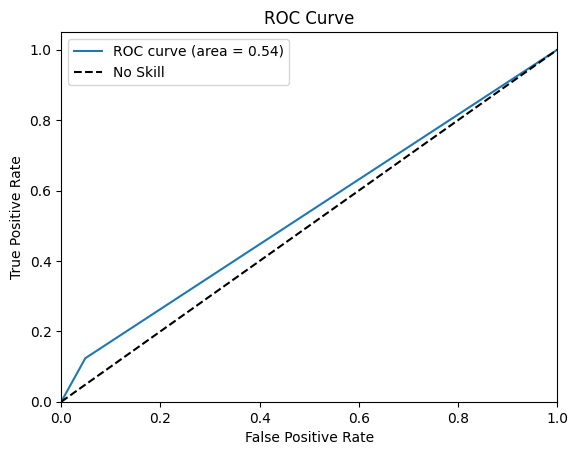

In [23]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

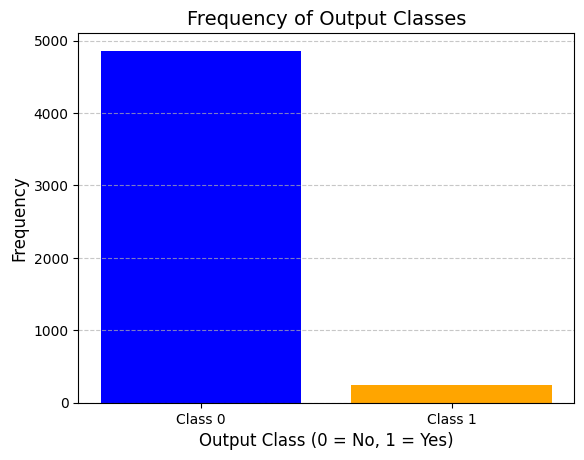

In [24]:
# Count the frequency of each class
class_counts = df['stroke'].value_counts()

# Plot the frequency of output classes
plt.figure()
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.title('Frequency of Output Classes', fontsize=14)
plt.xlabel('Output Class (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks([0, 1], labels=["Class 0", "Class 1"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Here we can clearly observe that frequency of class 0 is much greater than frequency of class 1. This will make the model bias towards class 0 which is not good

#### To avoid this we have to increase the frequency of class 1 
#### We apply SMOTE technique in oversampling to achieve this

## Applying SMOTE technique

In [25]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X1,y1=oversample.fit_resample(X,y)

  File "c:\Users\neelakanta\AppData\Local\Programs\Python\Python38\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\neelakanta\AppData\Local\Programs\Python\Python38\lib\subprocess.py", line 489, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\neelakanta\AppData\Local\Programs\Python\Python38\lib\subprocess.py", line 854, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\neelakanta\AppData\Local\Programs\Python\Python38\lib\subprocess.py", line 1307, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


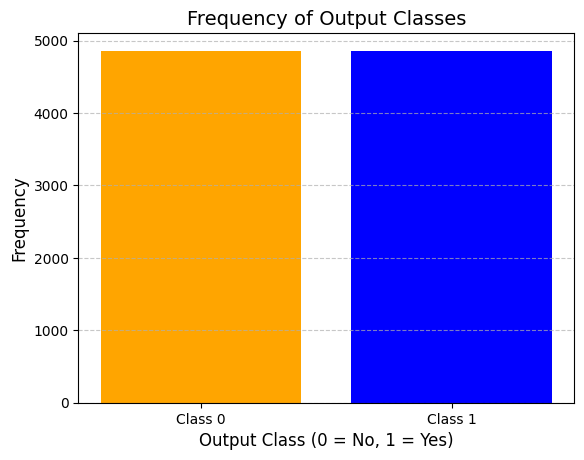

In [28]:
# Count the frequency of each class
class_counts = y1.value_counts()

# Plot the frequency of output classes
plt.figure()
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.title('Frequency of Output Classes', fontsize=14)
plt.xlabel('Output Class (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks([0, 1], labels=["Class 0", "Class 1"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Here we can observe that the frequency of class 1 is increased gradually and it became similar to the class 0. Now we have a balanced dataset

In [36]:
# Train and test split
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=42)

In [37]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(6805, 19)
(2917, 19)
(6805,)
(2917,)


In [38]:
classifier2=DecisionTreeClassifier()

In [39]:
classifier2.fit(X1_train,y1_train)

DecisionTreeClassifier()

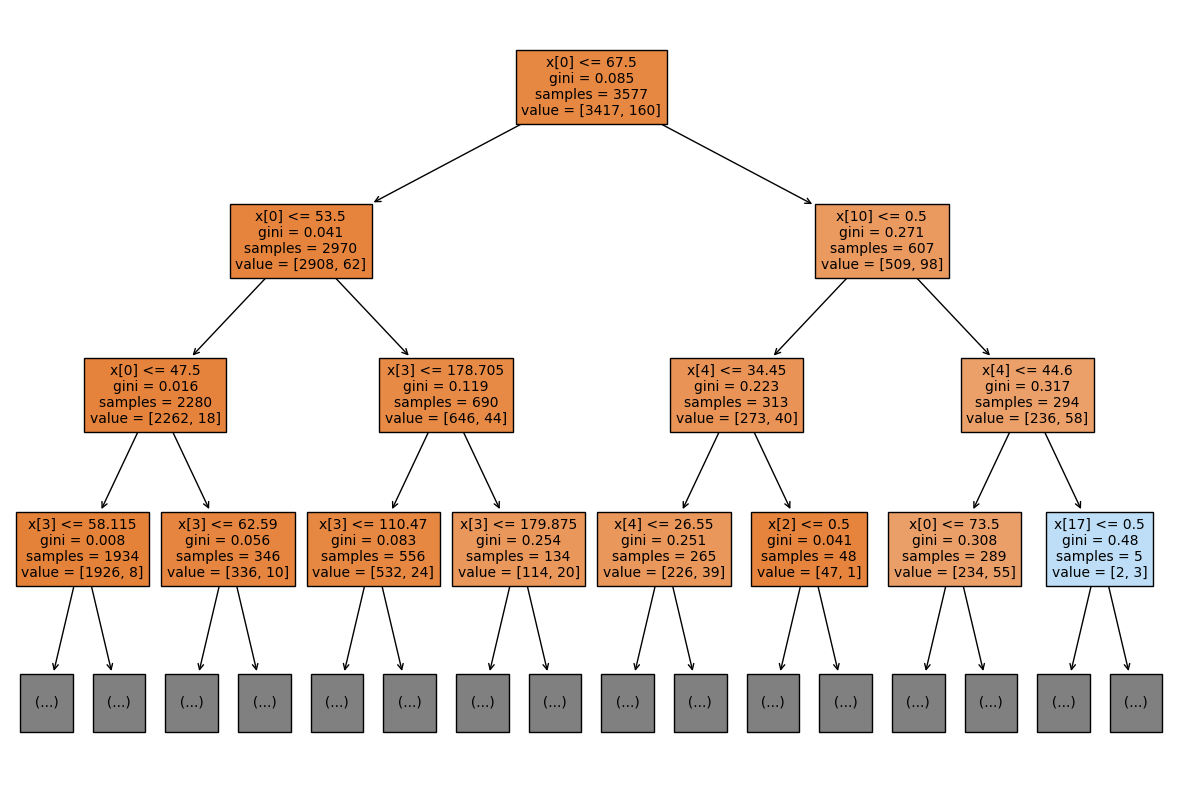

In [41]:
# Visualize the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True,fontsize=10,max_depth=3)
plt.show()

In [29]:
y1_pred=classifier2.predict(X1_test)

In [30]:
accuracy=accuracy_score(y1_test,y1_pred)
cm=confusion_matrix(y1_test,y1_pred)

In [31]:
print('Accuracy: ',accuracy)

Accuracy:  0.9400068563592733


In [32]:
print('Confusion Matrix: ')
print(cm)

Confusion Matrix: 
[[1367   90]
 [  85 1375]]


In [33]:
print('classification Report:')
print(classification_report(y1_test,y1_pred))

classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1457
           1       0.94      0.94      0.94      1460

    accuracy                           0.94      2917
   macro avg       0.94      0.94      0.94      2917
weighted avg       0.94      0.94      0.94      2917



#### The precision and recall has increased for class 1 after applying SMOTE technique

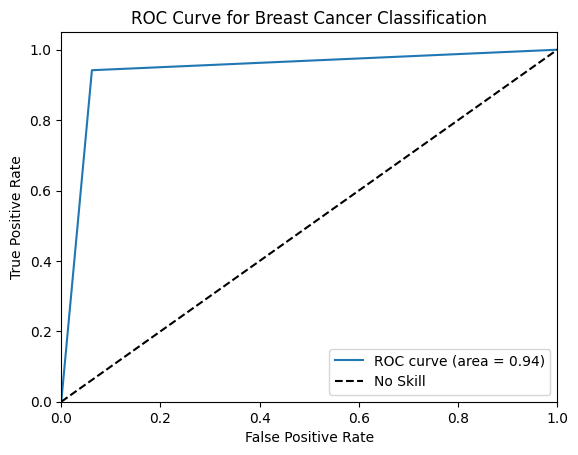

In [34]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y1_test, y1_pred) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()
plt.show()

## Hyper parameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV

params={'criterion':['gini', 'entropy', 'log_loss'],
            'splitter':['best','random'],
            'max_depth':[3,4,5,6,7,8],
            'class_weight':['balanced']}

classifier_CV=GridSearchCV(estimator=classifier2,param_grid=params,cv=5,scoring='precision')

classifier_CV.fit(X1_train,y1_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']},
             scoring='precision')

In [43]:
print(classifier_CV.best_params_)

{'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': 7, 'splitter': 'random'}


In [44]:
classifier_CV.best_score_

0.9489025117069272

In [45]:
model=classifier_CV.best_estimator_

In [46]:
model.fit(X1_train,y1_train)

DecisionTreeClassifier(class_weight='balanced', criterion='log_loss',
                       max_depth=7, splitter='random')

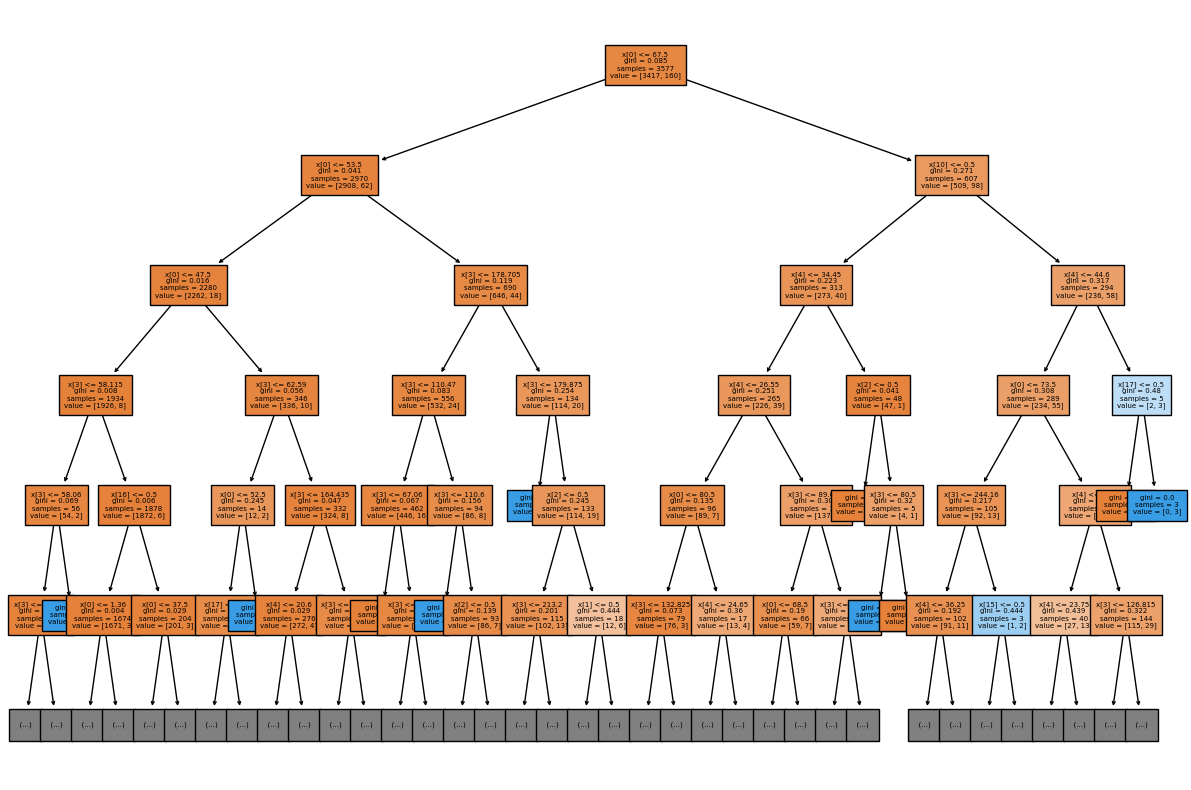

In [49]:
# Visualize the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True,fontsize=5,max_depth=5)
plt.show()

In [40]:
y_pred_cv=model.predict(X1_test)

In [41]:
accuracy=accuracy_score(y1_test,y_pred_cv)
cm=confusion_matrix(y1_test,y_pred_cv)

In [42]:
print('Accuracy: ',accuracy)

Accuracy:  0.9310935893040795


In [43]:
print('Confusion Matrix: ')
print(cm)

Confusion Matrix: 
[[1390   67]
 [ 134 1326]]


In [44]:
print('classification Report:')
print(classification_report(y1_test,y_pred_cv))

classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1457
           1       0.95      0.91      0.93      1460

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917



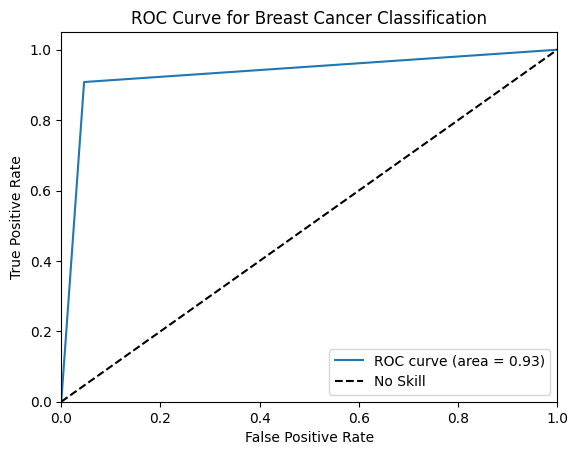

In [45]:
fpr, tpr, thresholds = roc_curve(y1_test, y_pred_cv) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()
plt.show()

### Pickling the model 

In [96]:
import pickle
pickle.dump(model,open('model.pkl','wb'))